In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Get the first .csv file to see if everything works
df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [17]:
#Get all the files in the directory and append to a new DataFrame
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]

data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    data = pd.concat([data,df])

In [19]:
data.to_csv("data.csv",index=False)

In [25]:
data = pd.read_csv("data.csv")
data.head()
#data.tail()
#There seem to be NaN values rows in the dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### DATA CLEANING

In [56]:
data.isnull().sum() #545 null values. Let's drop them
data = data.dropna()

data = data[data["Order Date"].str[0:2] != "Or"] #Remove "Or" values
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])

Question Answering

In [82]:

#Best month for sales and how much was earned that month
#Let's add a month column
data["Month"] = data["Order Date"].str[0:2]
data["Month"] = data["Month"].astype("int32") #Produces an Error. 'Or' values in Month column. Remove them.

#Add a sales column
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]  #TypeError: can't multiply sequence by non-int of type 'str'. More Data cleaning!!!

#City column
data["City"] = data["Purchase Address"].apply(lambda x: x.split(",")[1] + ' (' + x.split(",")[2].split(" ")[1]+")") #Problem!! There might be duplicate cities. For Examples: Portland Maine and Portland Oregon. Need to add the 2nd split on index 1
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [75]:
#Back to the question
sales = data.groupby("Month").sum()["Sales"] #December seems to have the highest Sales.

Text(0.5, 1.0, 'Sales')

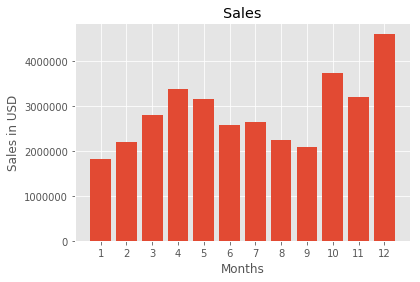

In [76]:
months = range(1,13)
plt.bar(months,sales)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.title("Sales")

##### 2nd Question: What US city had the highest number of sales

In [84]:
#Need to add a city column
city_sales = data.groupby("City").sum()["Sales"]

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales')

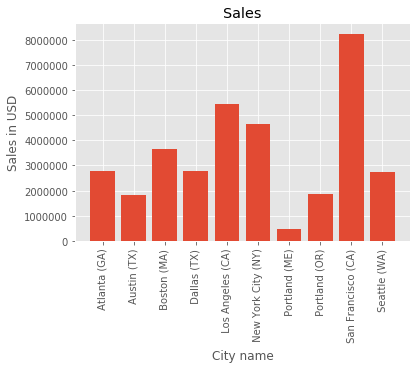

In [90]:
cities = [city for city,df in data.groupby("City")]

plt.bar(cities,city_sales)
plt.xticks(cities,rotation="vertical")
plt.xlabel("City name")
plt.ylabel("Sales in USD")
plt.title("Sales")


##### What time should we display advertisements to maximize likelihood of customer's buying product

Text(0, 0.5, 'Number of Orders')

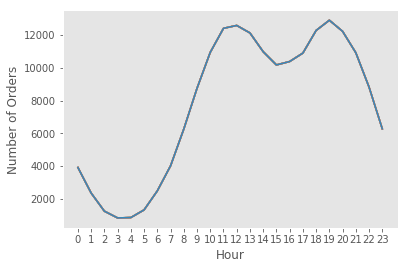

In [104]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Hour"] = data["Order Date"].dt.hour

hours = [hour for hour,df in data.groupby("Hour")]
plt.plot(hours,data.groupby(["Hour"]).count()) ## Group by and just count the values
plt.grid()
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
#Recommendation around 11am and 6-7pm

#### What producs are most often sold together?

In [110]:
# Check where IDs are the same!

df = data[data["Order ID"].duplicated(keep=False)]
df.head(10)

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [117]:
# Counting unique pairs of numbers into a python dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most?


In [120]:
grouped_prod = data.groupby("Product").sum()["Quantity Ordered"]

In [123]:
products = [product for product,df in data.groupby("Product")]

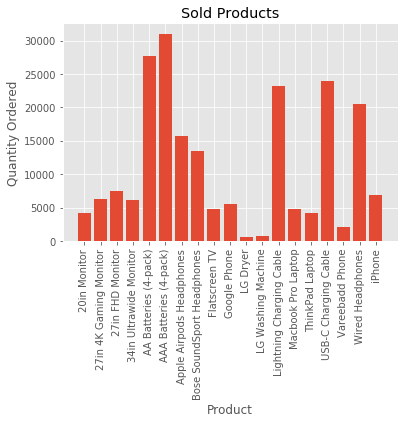

In [128]:
plt.bar(products,grouped_prod)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(products,rotation="vertical")
plt.title("Sold Products")
plt.show()

In [129]:
prices =data.groupby("Product").mean()["Price Each"]
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


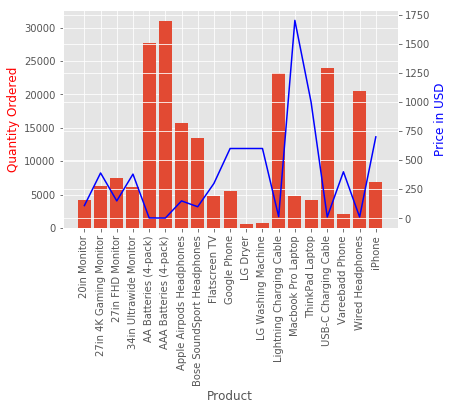

In [136]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,grouped_prod)
ax2.plot(products,prices,"-b")

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered",color="red")
ax2.set_ylabel("Price in USD",color="b")
ax1.set_xticklabels(products,rotation="vertical")
plt.show()
